# Data import

Common tomography data formats are imported through [DXchange](http://dxchange.readthedocs.org/en/latest/source/api/dxchange.exchange.html) (available through Conda):


In [1]:
import dxchange as dx

In [2]:
prj, flat, dark, ang = dx.read_aps_32id('data/data-simulated.h5')

# Tomographic image reconstruction

## Direct reconstruction algorithms

* Filtered-Backprojection with interpolation on Fourier space (Gridrec)
* Filtered-Backprojection with interpolation on real space (FBP)

In [3]:
import tomopy
import matplotlib.pyplot as plt

Reconstructing 48 slice groups with 6 master threads...


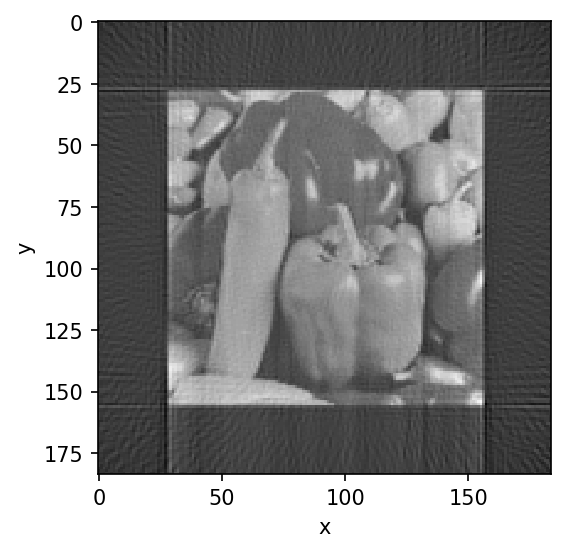

In [4]:
rec = tomopy.recon(prj, ang, algorithm='gridrec')

plt.figure(dpi=150)
plt.imshow(rec[0], cmap='gray', interpolation='none')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

One can define the shape of the final image reconstruction:

Reconstructing 48 slice groups with 6 master threads...


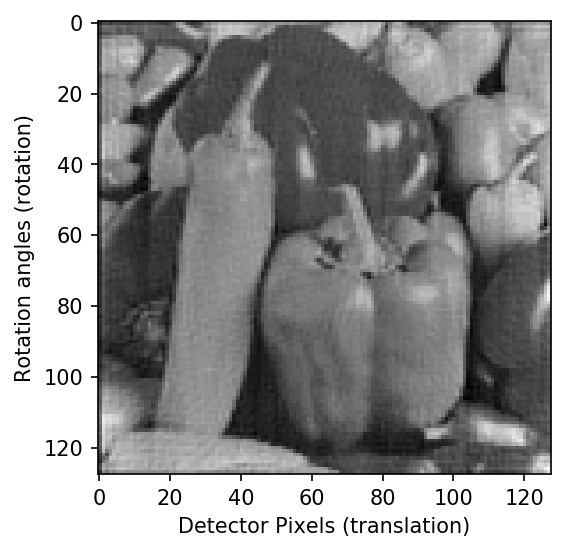

In [5]:
rec = tomopy.recon(prj, ang, algorithm='gridrec', num_gridx=128, num_gridy=128)

plt.figure(dpi=150)
plt.imshow(rec[0], cmap='gray', interpolation='none')
plt.xlabel('Detector Pixels (translation)')
plt.ylabel('Rotation angles (rotation)')
plt.show()

### Choosing filters

Available filters:

* Ramp
* Shepp-Logan
* Butterworth
* Parzen
* Cosine
* Hamming

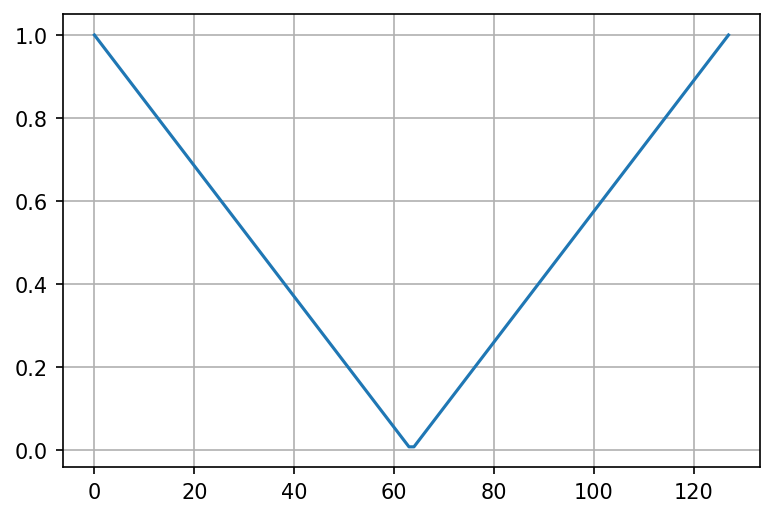

In [6]:
import numpy as np

# Butterworth filter parameters
cutoff = 1. # [0, 1]
order = 0. # 0, 1, 2, 3, ...

x = np.abs(np.linspace(-1, 1, 128))
y = 2 * x / (1 + np.power(x/cutoff, 2*order))

plt.figure(dpi=150)
plt.plot(y)
plt.axis('tight')
plt.grid('on')
plt.show()

Reconstructing 48 slice groups with 6 master threads...


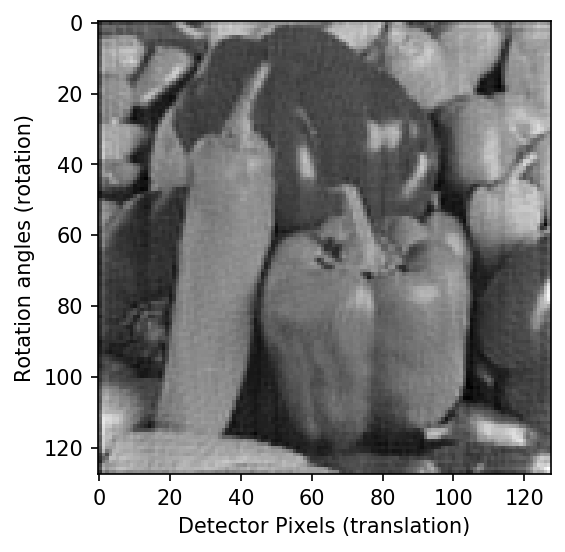

In [16]:
rec = tomopy.recon(
    prj, ang, algorithm='gridrec', 
    num_gridx=128, num_gridy=128, 
    filter_name='butterworth', filter_par=[0.5, 2.],
)

plt.figure(dpi=150)
plt.imshow(rec[0], cmap='gray', interpolation='none')
plt.xlabel('Detector Pixels (translation)')
plt.ylabel('Rotation angles (rotation)')
plt.show()

## Iterative reconstrucrtion algorithms

### Without penalization

#### Kaczmarz methods:

* Algebrais Reconstruction Technique (ART)
* Simultaneous Iterative Reconstruction Technique (SIRT)
* Block Algebraic Reconstruction (BART)

Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...


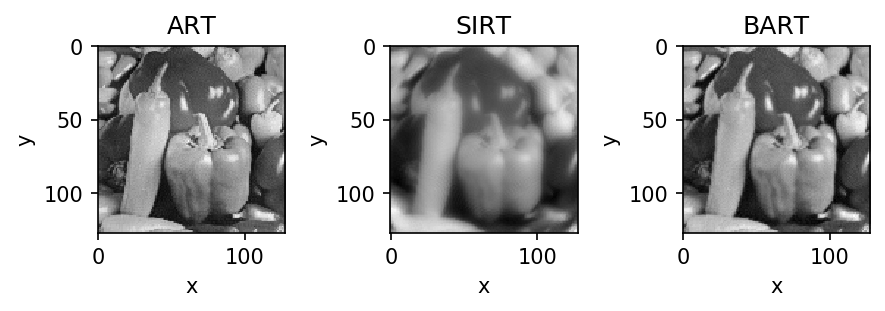

In [8]:
# ART
rec1 = tomopy.recon(prj, ang, algorithm='art', 
                   num_gridx=128, num_gridy=128,
                   num_iter=10)

# SIRT
rec2 = tomopy.recon(prj, ang, algorithm='sirt', 
                   num_gridx=128, num_gridy=128,
                   num_iter=10)

# BART
rec3 = tomopy.recon(prj, ang, algorithm='bart', 
                   num_gridx=128, num_gridy=128,
                   num_iter=10, 
                   num_block=10)

plt.figure(dpi=150, tight_layout=True)
plt.subplot(131)
plt.imshow(rec1[0], cmap='gray', interpolation='none')
plt.title('ART')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(132)
plt.imshow(rec2[0], cmap='gray', interpolation='none')
plt.title('SIRT')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(133)
plt.imshow(rec3[0], cmap='gray', interpolation='none')
plt.title('BART')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Expectation maximization algorithms:

* Maximum-Likelihood Expectation-Maximization (MLEM)
* Ordered Subset Expectation-Maximization (OSEM)

Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...


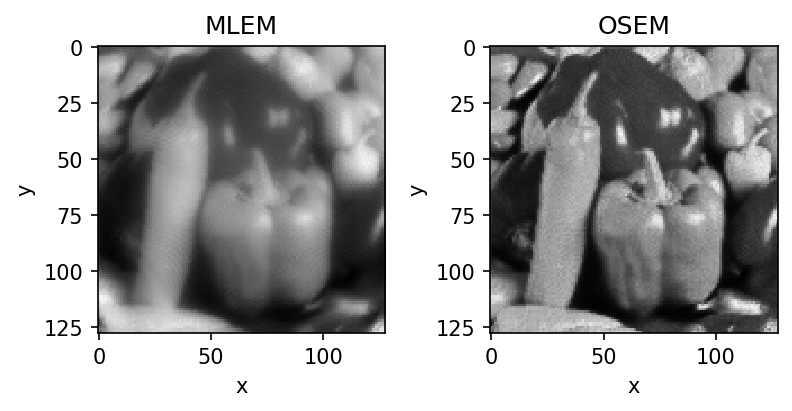

In [9]:
# MLEM
rec4 = tomopy.recon(prj, ang, algorithm='mlem', 
                   num_gridx=128, num_gridy=128,
                   num_iter=10)

# OSEM
rec5 = tomopy.recon(prj, ang, algorithm='osem', 
                   num_gridx=128, num_gridy=128,
                   num_iter=10, 
                   num_block=10)

plt.figure(dpi=150, figsize=(8, 4), tight_layout=True)
plt.subplot(131)
plt.imshow(rec4[0], cmap='gray', interpolation='none')
plt.title('MLEM')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(132)
plt.imshow(rec5[0], cmap='gray', interpolation='none')
plt.title('OSEM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### With quadratic penalization

#### Expectation maximization algorithms:

* Penalized Maximum-Likelihood with Quadratic penalty (PML_QUAD)
* Ordered Subset Penalized Maximum-Likelihood with Quadratic penalty (OSMPL_QUAD)

Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...


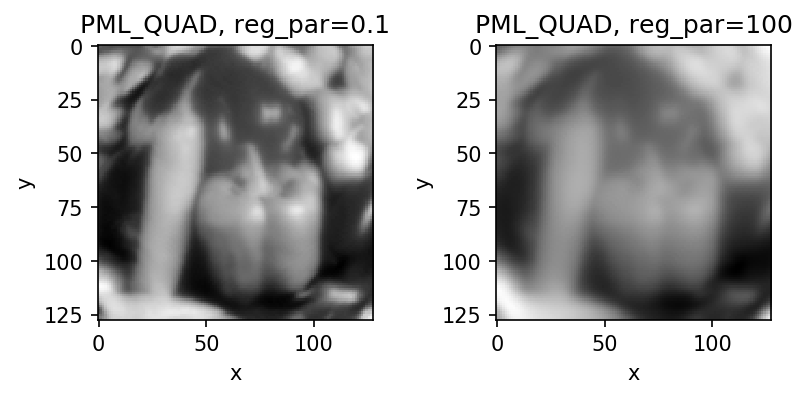

In [10]:
# PML_QUAD
rec4 = tomopy.recon(prj, ang, algorithm='pml_quad', 
                   num_gridx=128, num_gridy=128,
                   num_iter=20,
                   reg_par=0.1)

rec5 = tomopy.recon(prj, ang, algorithm='pml_quad', 
                   num_gridx=128, num_gridy=128,
                   num_iter=20,
                   reg_par=100)

plt.figure(dpi=150, figsize=(8, 4), tight_layout=True)
plt.subplot(131)
plt.imshow(rec4[0], cmap='gray', interpolation='none')
plt.title('PML_QUAD, reg_par=0.1')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(132)
plt.imshow(rec5[0], cmap='gray', interpolation='none')
plt.title('PML_QUAD, reg_par=100')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### With hybrid (mixed quadratic-linear) penalization

#### Expectation maximization algorithms:

* Penalized Maximum-Likelihood with Hybrid penalty (PML_HYBRID)
* Ordered Subset Penalized Maximum-Likelihood with Hybrid penalty (OSMPL_QUAD)

Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...


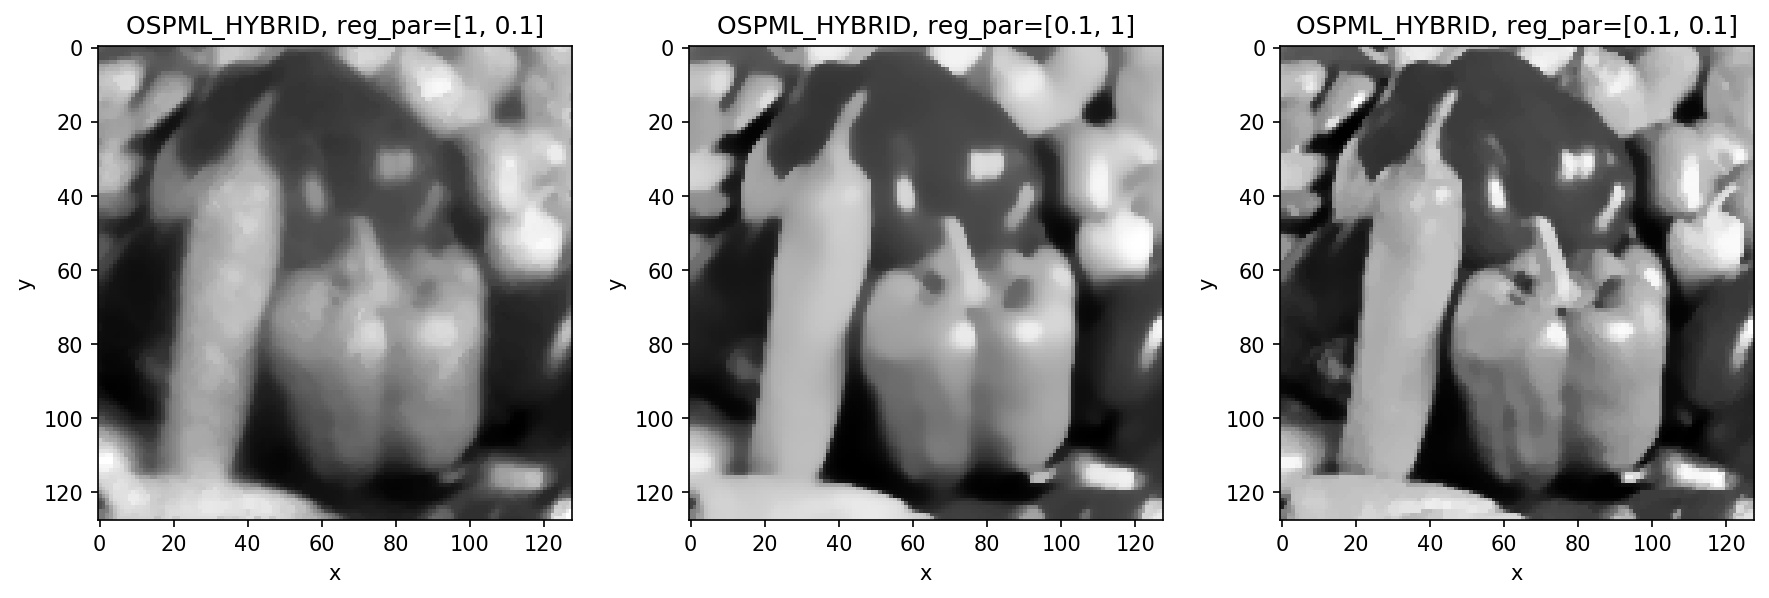

In [11]:
# OSPML_HYBRID
rec4 = tomopy.recon(prj, ang, algorithm='ospml_hybrid', 
                   num_gridx=128, num_gridy=128,
                   num_iter=20,
                   reg_par=[1, 0.1])

rec5 = tomopy.recon(prj, ang, algorithm='ospml_hybrid', 
                   num_gridx=128, num_gridy=128,
                   num_iter=20,
                   reg_par=[0.1, 1],
                   num_block=10)

rec6 = tomopy.recon(prj, ang, algorithm='ospml_hybrid', 
                   num_gridx=128, num_gridy=128,
                   num_iter=20,
                   reg_par=[0.1, 0.1],
                   num_block=10)

plt.figure(dpi=150, figsize=(12, 4), tight_layout=True)
plt.subplot(131)
plt.imshow(rec4[0], cmap='gray', interpolation='none')
plt.title('OSPML_HYBRID, reg_par=[1, 0.1]')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(132)
plt.imshow(rec5[0], cmap='gray', interpolation='none')
plt.title('OSPML_HYBRID, reg_par=[0.1, 1]')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(133)
plt.imshow(rec6[0], cmap='gray', interpolation='none')
plt.title('OSPML_HYBRID, reg_par=[0.1, 0.1]')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Initialization of iterative algorithms

Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...
Reconstructing 48 slice groups with 6 master threads...


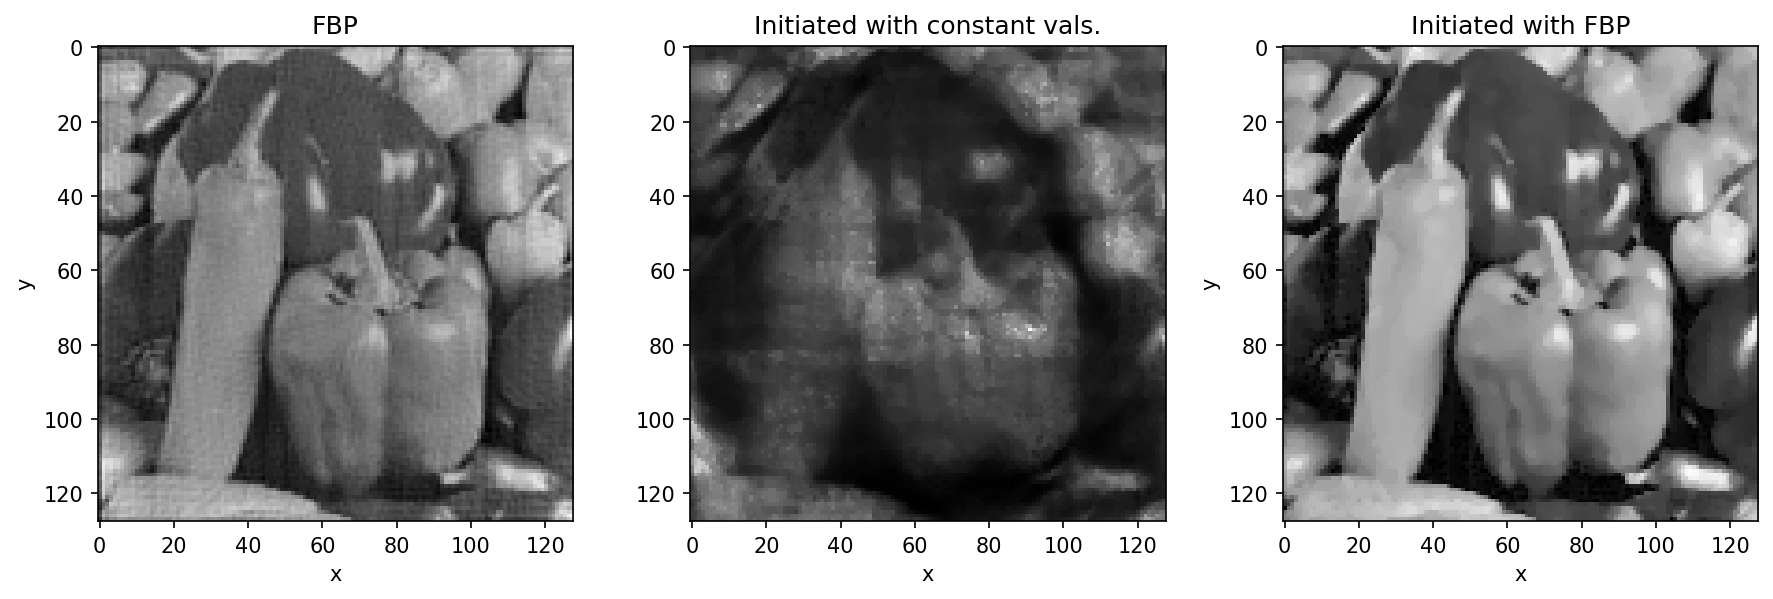

In [12]:
rec0 = tomopy.recon(prj, ang, algorithm='gridrec', 
                    num_gridx=128, num_gridy=128)

rec7 = tomopy.recon(prj, ang, algorithm='ospml_hybrid', 
                    num_gridx=128, num_gridy=128,
                    num_iter=1,
                    reg_par=[0.1, 0.1],
                    num_block=50)

rec8 = tomopy.recon(prj, ang, algorithm='ospml_hybrid', 
                    num_gridx=128, num_gridy=128,
                    num_iter=1,
                    reg_par=[0.1, 0.1],
                    num_block=50,
                    init_recon=np.abs(rec0.copy()))


plt.figure(dpi=150, figsize=(12, 4), tight_layout=True)
plt.subplot(131)
plt.imshow(rec0[0], cmap='gray', interpolation='none')
plt.title('FBP')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(132)
plt.imshow(rec7[0], cmap='gray', interpolation='none')
plt.title('Initiated with constant vals.')
plt.xlabel('x')
plt.subplot(133)
plt.ylabel('y')
plt.imshow(rec8[0], cmap='gray', interpolation='none')
plt.title('Initiated with FBP')
plt.xlabel('x')
plt.ylabel('y')
plt.show()